In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scarches.models.scpoli import scPoli

import warnings
from matplotlib import rcParams
FIGSIZE=(2,2)
rcParams['figure.figsize']=FIGSIZE

/home/icb/alessandro.palma/miniconda3/envs/IMPA_try/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/icb/alessandro.palma/miniconda3/envs/IMPA_try/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
 captum (see https://github.com/pytorch/captum).


In [2]:
path_before_correction = "/home/icb/alessandro.palma/environment/IMPA/IMPA/project_folder/dino_featurization_project/featurized_anndata/rxrx1/rxrx1_adata_before_transf.h5ad" 
path_after_correction = "/home/icb/alessandro.palma/environment/IMPA/IMPA/project_folder/dino_featurization_project/featurized_anndata/rxrx1/rxrx1_adata_after_transf.h5ad"

In [3]:
adata_before_correction = sc.read_h5ad(path_before_correction)
adata_after_correction = sc.read_h5ad(path_after_correction)

In [4]:
data_index = pd.read_csv('/home/icb/alessandro.palma/environment/IMPA/IMPA/project_folder/datasets/rxrx1/metadata/rxrx1_df.csv', index_col=1)
compound_names = []

for row in adata_before_correction.obs.iterrows():
    batch = row[1].batch
    plate = row[1].plate
    well = row[1].well
    view = row[1]["view"]
    no = row[1].no
    file_name = f"U2OS-{batch}_{plate}_{well}_{view}_{no}"
    cpd = data_index.loc[file_name].CPD_NAME
    compound_names.append(cpd)
    
adata_before_correction.obs["compound"] = compound_names

Integrate with scanorama and Harmony 

In [5]:
import scib

# Harmony

In [6]:
scib.ig.harmony(adata_before_correction, batch="batch")

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
Reach convergence after 2 iteration(s).


AnnData object with n_obs × n_vars = 170943 × 384
    obs: 'batch', 'plate', 'well', 'view', 'no', 'compound'
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_emb'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

/home/icb/alessandro.palma/miniconda3/envs/IMPA_try/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


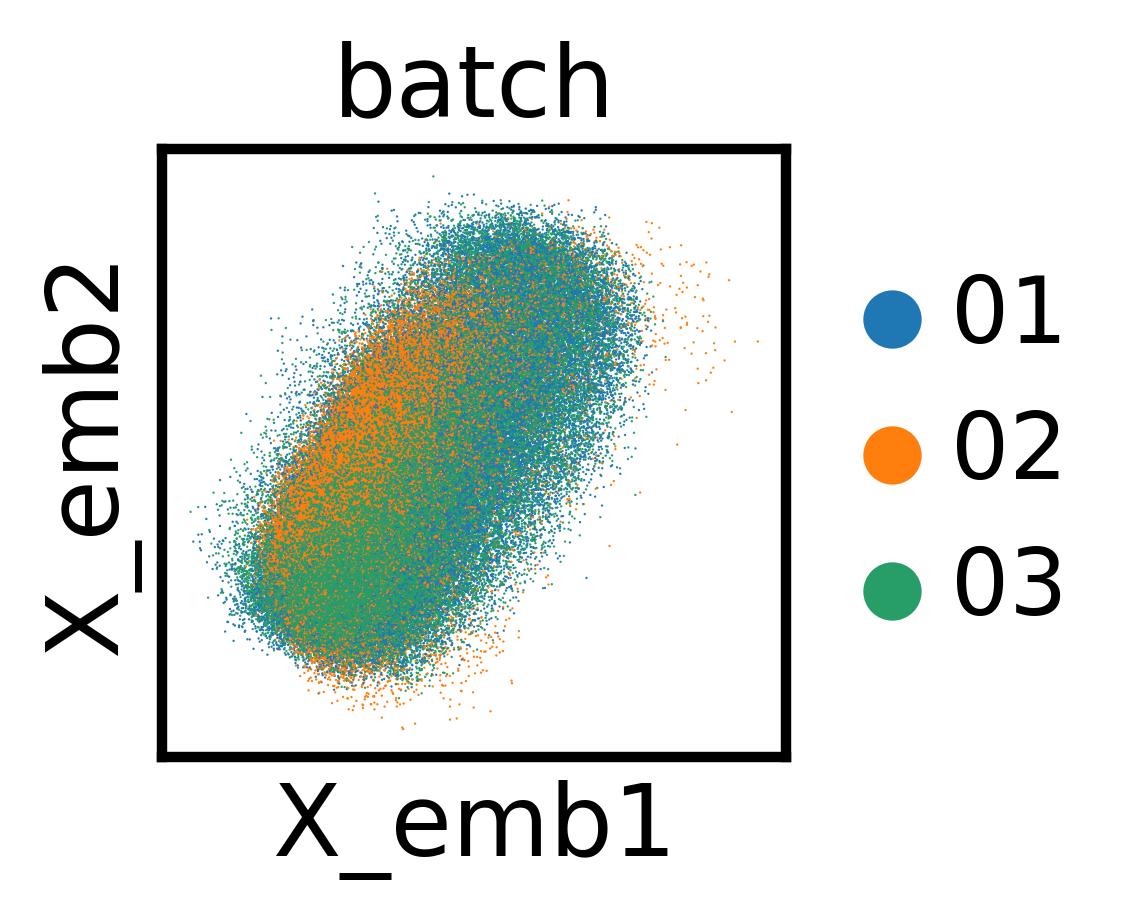

In [10]:
sc.pl.embedding(adata_before_correction, basis="X_emb",color="batch")

/home/icb/alessandro.palma/miniconda3/envs/IMPA_try/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


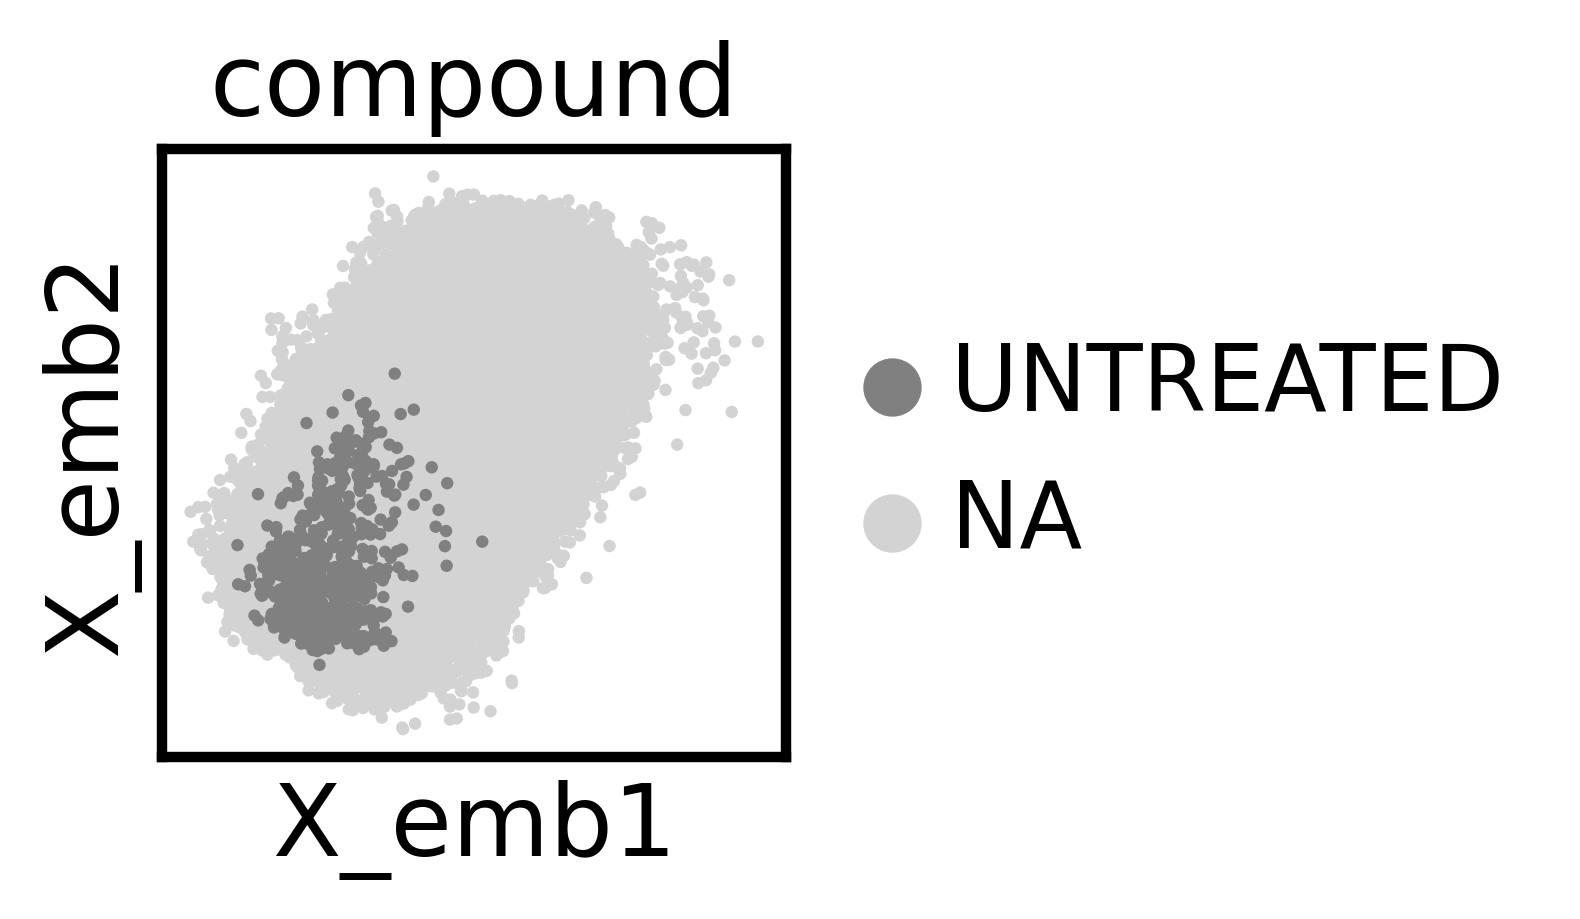

In [12]:
sc.pl.embedding(adata_before_correction, basis="X_emb",color="compound", groups="UNTREATED", s=20)

In [15]:
adata_before_correction.obsm["X_emb"].shape

(170943, 50)

/home/icb/alessandro.palma/miniconda3/envs/IMPA_try/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


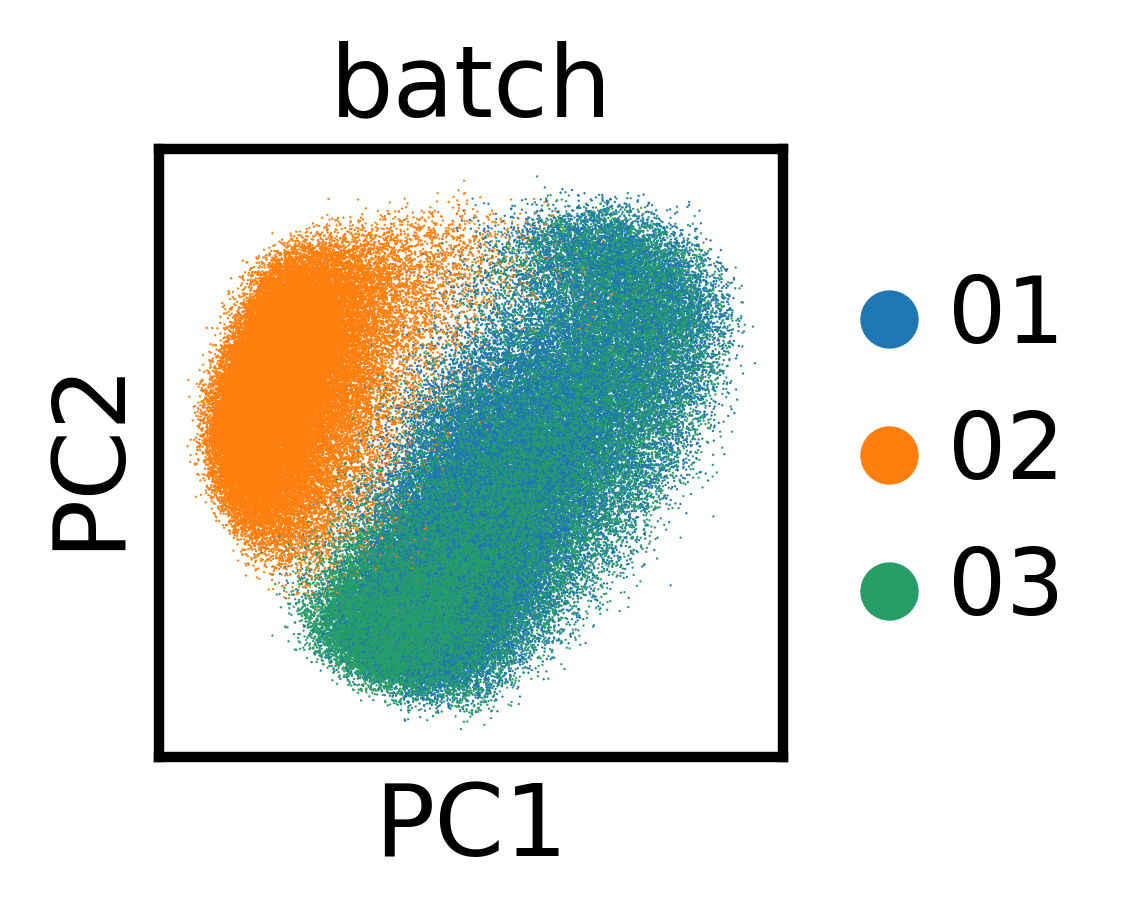

In [17]:
sc.pl.pca(adata_before_correction, color="batch")